In [50]:
import pandas as pd
import os

# Path to the CSV file
file_path = '/content/spam (1).csv'

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Display a sample of 6 rows from the DataFrame
        print(df.sample(6))
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"File '{file_path}' not found.")





An error occurred: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte


In [51]:
import pandas as pd
import os

# Path to the CSV file
file_path = '/content/spam (1).csv'

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, encoding='ISO-8859-1')

        # Display a sample of 6 rows from the DataFrame
        print(df.sample(6))
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"File '{file_path}' not found.")


        v1                                                 v2 Unnamed: 2  \
1429  spam  For sale - arsenal dartboard. Good condition b...        NaN   
3047   ham           Die... Now i have e toot fringe again...        NaN   
1956   ham     K...k:)why cant you come here and search job:)        NaN   
3379   ham                  Just finished. Missing you plenty        NaN   
351    ham  If you're not in my car in an hour and a half ...        NaN   
2935   ham  And stop wondering \wow is she ever going to s...        NaN   

     Unnamed: 3 Unnamed: 4  
1429        NaN        NaN  
3047        NaN        NaN  
1956        NaN        NaN  
3379        NaN        NaN  
351         NaN        NaN  
2935        NaN        NaN  


In [52]:
df.shape

(5572, 5)

**DATA** **Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(6)



,v1,v2
5469,ham,Ok lor.
3298,ham,Honeybee Said: *I'm d Sweetest in d World* God...
4394,ham,"Only just got this message, not ignoring you. ..."
3021,ham,How dare you change my ring
756,ham,Cant think of anyone with * spare room off * t...
818,ham,Then why you not responding


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
948,ham,Chk in ur belovd ms dict
5219,ham,Pls she needs to dat slowly or she will vomit ...
5553,ham,Hahaha..use your brain dear
2333,ham,What happen to her tell the truth
3800,ham,"It's ok, at least armand's still around"


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

#EDA

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

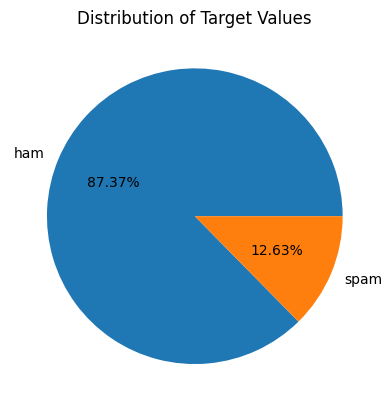

In [17]:
import matplotlib.pyplot as plt

# Assuming 'ham' and 'spam' are labels, enclose them in quotes if they are strings
labels = ['ham', 'spam']

# Replace 'df['target']' with your actual column name if it's different
plt.pie(df['target'].value_counts(), labels=labels, autopct="%0.2f%%")
plt.title('Distribution of Target Values')
plt.show()


In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_characters']= df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

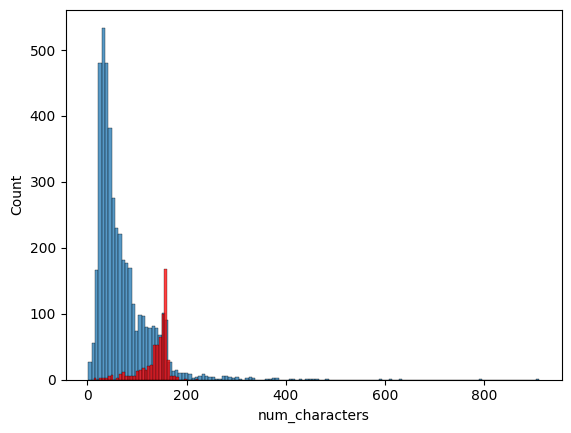

In [26]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

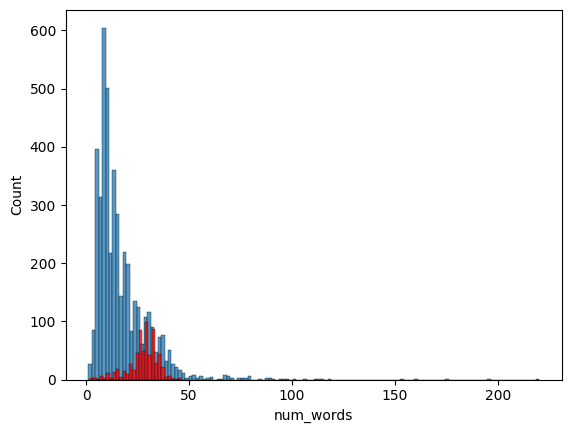

In [27]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

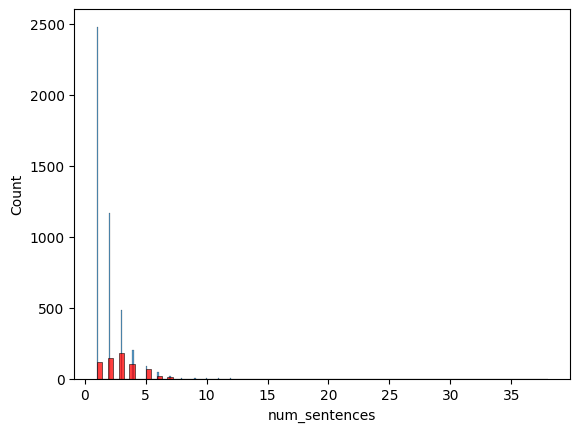

In [28]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

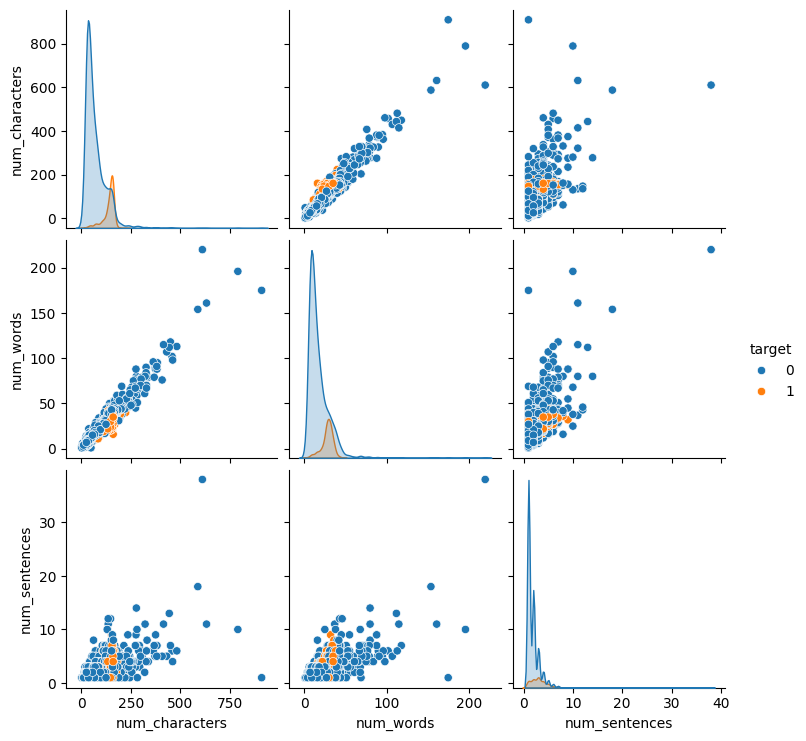

In [29]:
sns.pairplot(df,hue='target')

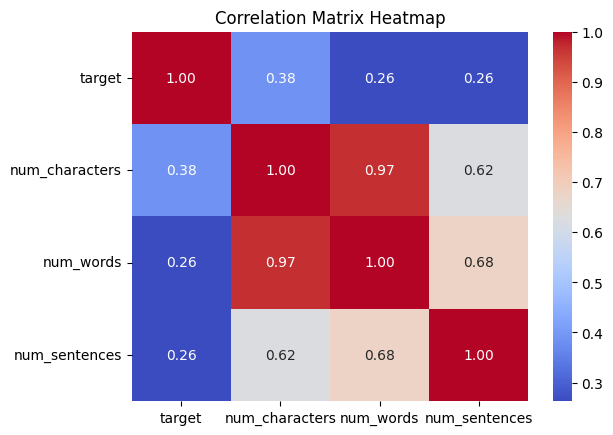

In [30]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Text** **preprocessing**

In [31]:
import nltk
from nltk.corpus import stopwords
import string

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return" " .join(y)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Now you can access the stopwords
english_stopwords = stopwords.words('english')
print(english_stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
transformed_text = transform_text('helo me zain i loved watcing netflix what about u? ')
print(transformed_text)

helo zain love watc netflix u


In [36]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('caring')

'care'

In [41]:
df['trans']= df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,trans
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=5,min_font_size=10,background_color='black')



In [43]:
spam_text = df[df['target'] == 1]['trans'].str.cat(sep=" ")

In [61]:
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)



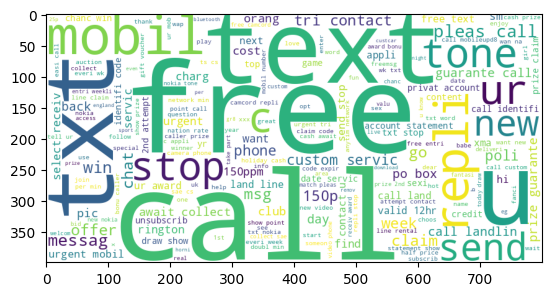

In [45]:
plt.imshow(spam_wc)